<img src="./pictures/DroneApp_logo.png" style="float:right; max-width: 180px; display: inline" alt="INSA" />
<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 100px; display: inline" alt="INSA" />

# Propellers estimation models with dimensional analysis and linear regressions

*Written by Marc Budinger, Aitor Ochotorena (INSA Toulouse) and Scott Delbecq (ISAE-SUPAERO), Toulouse, France.*

Propellers characteristics can be expressed by $C_T$ and $C_P$ coefficients. These coefficients are function of dimensions and conditions of use of propellers.  Dimensional analysis and linear regression of suppliers data can be used for the generation of $C_T$ and $C_P$ prediction models. 

*APC MR (Multi-Rotor) propellers*

![Heatsink](./pictures/apc-mr-props.jpg)



## Contents
1. [Dimensional analysis and $\pi$ numbers](#section_1)
2. [Choice of a proper propeller model](#section_2)
3. [Static behaviour](#section_3)

<a id='section_1'></a>

## Dimensional analysis and $\pi$ numbers

The propeller performances can be expressed with 2 aerodynamic coefficients:
- The thrust: $F = C_{T} \rho n^2 D^4$  
- The power: $P = C_{P} \rho n^3 D^5 $

The [dimensional analysis](https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node86.html#SECTION06374000000000000000) and especially the [Buckingham $\pi$ theorem](https://en.wikipedia.org/wiki/Buckingham_%CF%80_theorem) enable to find this results.


#### Dimensional analysis of the propeller thrust  

The thrust $F$ of a propeller depends of multiple parameters (geometrical dimensions, air properties, operational points):  
$F=f(\rho_{air},n,D,p,V,\beta_{air})$   
with the parameters express in the following table.

Parameter|M|L|T|
--|--|--|--
Thrust $T$ [N] | 1|1|-2
Mass volumic (Air) $\rho_{air}$ [kg/m$^3$]| 1 | -3 | 0|
Rotational speed $n$ [Hz] | 0 | 0 | -1|
Diameter $D$ [m] | 0| 1 | 0|
Pitch $p$ [m] | 0 | 1 | 0|
Drone speed $V$ [m/s] | 0 | 1 | -1|
Bulk modulus (Air) $\beta_{air}$ [m/s] | 1 | -1 | -2|
$=\pi_0$|  |  |  |
$=\pi_1$|  |  |  |
$=\pi_2$|  |  |  |
$=\pi_3$|  |  |  |


**Remark**: The dimension of a parameter $x$ is function of dimensions L, M and T : $[x]=M^aL^bT^c$.  The previous table gives the value of $a$, $b$ and $c$ for each parameter of the problem. 

> **Exercice**: Complete the table with 4 dimensionless $\pi$ numbers possible for the given problem. Explain the number of dimensionless number.


**Answer:**

Buckingham $\pi$ theorem: 7 parameters - 3 dimensions = 4 dimensionless $\pi$ numbers

Parameter|M|L|T|
--|--|--|--
Thrust $T$ [N] | 1|1|-2
Mass volumic (Air) $\rho_{air}$ [kg/m$^3$]| 1 | -3 | 0|
Rotational speed $n$ [Hz] | 0 | 0 | -1|
Diameter $D$ [m] | 0| 1 | 0|
Pitch $Pitch$ [m] | 0 | 1 | 0|
Drone speed $V$ [m/s] | 0 | 1 | -1|
Bulk modulus (Air) $\beta_{air}$ [Pa] | 1 | -1 | -2|
$C_t=\frac{T}{\rho n^2D^4}=\pi_0$| 0 | 0 | 0 |
$\frac{Pitch}{D}=\pi_1$| 0 | 0 | 0 |
$J=\frac{V}{nD}=\pi_2$| 0 | 0 | 0 |
$\frac{\rho n^2D^2}{\beta}=\pi_3$| 0 | 0 | 0 |


#### Effect of the rotational speed  

APC suppliers give complete [propeller data](https://www.apcprop.com/technical-information/) for all their propellers. From the file *APC_STATIC-data-all-props.csv*, we find all static data provided by APC:

In [1]:
import pandas as pd

# Read the .csv file with bearing data
path='./data/'
df = pd.read_csv(path+'APC_STATIC-data-all-props.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,LINE,COMP,TYPE,RPM,DIAMETER(IN),PITCH(IN),BLADE(nb),THRUST(LBF),POWER(HP),TORQUE(IN.LBF),Cp,Ct,AREA(m^2),THRUST(N),POWER(W),ANGLE,EFF,N.D
0,1,1,NaN,1000,10.5,4.5,2,0.03,0.01,0.02,0.03,0.08,0.06,0.1335,7.457,0.43,60.180222,10500.0
1,2,1,NaN,2000,10.5,4.5,2,0.13,0.01,0.08,0.03,0.08,0.06,0.5785,7.457,0.43,60.180222,21000.0
2,3,1,NaN,3000,10.5,4.5,2,0.29,0.01,0.17,0.03,0.08,0.06,1.2905,7.457,0.43,60.180222,31500.0
3,4,1,NaN,4000,10.5,4.5,2,0.52,0.02,0.30,0.03,0.08,0.06,2.3140,14.914,0.43,60.180222,42000.0
4,5,1,NaN,5000,10.5,4.5,2,0.81,0.04,0.47,0.03,0.08,0.06,3.6045,29.828,0.43,60.180222,52500.0


For next steps, we keep only the Multi-Rotor type propellers (MR). 

In [2]:
# Data Filtering
# Keeping only multirotor (MR) type
df_MR=df[df['TYPE']=='MR']
df_MR.head()

,LINE,COMP,TYPE,RPM,DIAMETER(IN),PITCH(IN),BLADE(nb),THRUST(LBF),POWER(HP),TORQUE(IN.LBF),Cp,Ct,AREA(m^2),THRUST(N),POWER(W),ANGLE,EFF,N.D
135,147,8,MR,2000,10.0,4.5,2,0.14,0.01,0.09,0.04,0.11,0.05,0.6230,7.457,0.45,72.772802,20000.0
146,148,8,MR,3000,10.0,4.5,2,0.32,0.01,0.20,0.04,0.11,0.05,1.4240,7.457,0.45,72.772802,30000.0
147,149,8,MR,4000,10.0,4.5,2,0.57,0.02,0.36,0.04,0.11,0.05,2.5365,14.914,0.45,72.772802,40000.0
148,150,8,MR,5000,10.0,4.5,2,0.90,0.04,0.56,0.04,0.11,0.05,4.0050,29.828,0.45,72.772802,50000.0
149,151,8,MR,6000,10.0,4.5,2,1.29,0.08,0.79,0.04,0.11,0.05,5.7405,59.656,0.45,72.772802,60000.0


We plot the $C_p$ and $C_t$ for the a 10x4.5 propeller (COMP n° 8 in the previous table). We can notice that these coefficients are constant up to a certain value of speed of rotation. The manufacturer recommends using these propellers for a product speed of rotation $\times$ diameter less than a limit (depending on the type of propeller technology) and given [here](https://www.apcprop.com/technical-information/rpm-limits/):  
Maximum speed(RPM) x prop diameter (inches) = 105,000  
for MR type which gives a blade tip speed of 135 m/s. The dark spots on the following diagram correspond to this non-recommended operating zone.

> **Question:** Explain the origin of this operating limit comes from and the $\pi$ number that can express it.


**Answer:**

The $\frac{\rho_{air} n^2D^2}{\beta}$ dimensionless number is similar to Mach number $M_a=V/c$ with $c=\sqrt{\frac{\beta_{air}}{\rho_{air}}}$ the speed of sound:  
$$\frac{\rho n^2D^2}{\beta_{air}}=M_a^2$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt


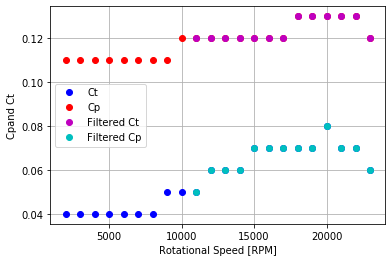

In [6]:
# Keep only the component n°8
df_8=df_MR[df_MR['COMP']==8]

# Extract forbidden ND product
df_8_ND=df_8[df_8['N.D']>105000.]

# Plot the data
plt.plot(df_8['RPM'],df_8['Cp'], 'bo', label='Ct')
plt.plot(df_8['RPM'],df_8['Ct'], 'ro', label='Cp')
plt.plot(df_8_ND['RPM'], df_8_ND['Ct'], 'mo', label='Filtered Ct')
plt.plot(df_8_ND['RPM'], df_8_ND['Cp'], 'co', label='Filtered Cp')
plt.xlabel('Rotational Speed [RPM]')
plt.ylabel('Cpand Ct')
plt.legend()
plt.grid()
plt.show()

<a id='section_2'></a>

## Choice of a proper propeller model

The choice of a propeller is based on criteria of good static and dynamic performance. In the following table, we have gathered data values from different propeller families for a middle-range model:

-  APC-E-9x4.5    
-  Graupner CAM 9x4
-  Graupner Super Nylon 9x4
-  KAVON FK 9x4
-  KYOSHO 9x6
-  MASTER AIRSCREW G/F 9x5
-  APC MR 9x4.5


Data available [here](https://m-selig.ae.illinois.edu/props/volume-1/propDB-volume-1.html)

In [1]:
import pandas as pd

path='./data/'
df = pd.read_csv(path+'9x45-DynamicProps.csv',sep=';')

df.head()

,TYPE,J,CT,CP,Eta
0,APC-E-9x4.5,0.160,0.0792,0.0386,0.328
1,APC-E-9x4.5,0.195,0.0729,0.0375,0.381
2,APC-E-9x4.5,0.234,0.0656,0.0356,0.432
3,APC-E-9x4.5,0.278,0.0578,0.0333,0.482
4,APC-E-9x4.5,0.315,0.0524,0.0316,0.522


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


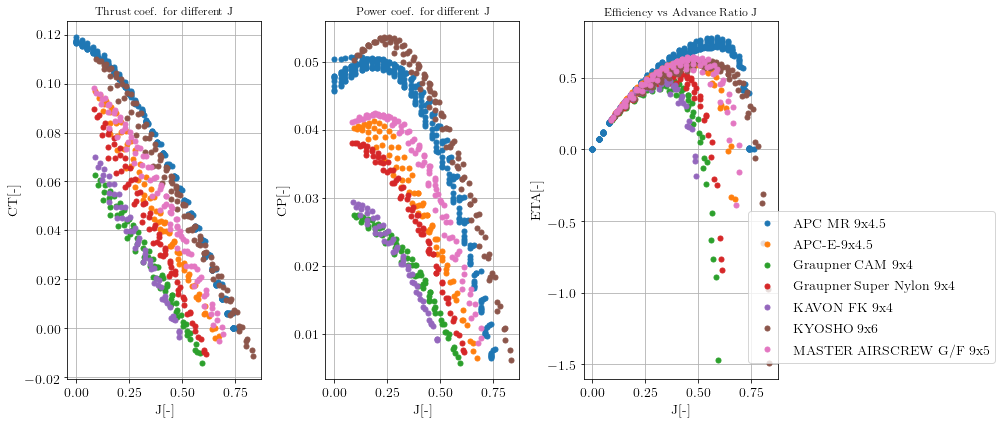

In [35]:

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')


f, ((ax1, ax2,ax3)) = plt.subplots(1, 3,figsize=(11, 6))
# f.tight_layout()

groups = df.groupby('TYPE')

for name, group in groups:
    ax1.plot(group.J, group.CT, marker='o', linestyle='', ms=5, 
label=name)
    
ax1.set_title('Thrust coef. for different J')
ax1.set_xlabel('J[-]',fontsize=14)
ax1.set_ylabel('CT[-]',fontsize=14)

for name, group in groups:
    ax2.plot(group.J, group.CP, marker='o', linestyle='', ms=5, 
label='_nolegend_')
    
ax2.set_title('Power coef. for different J')
ax2.set_xlabel('J[-]',fontsize=14)
ax2.set_ylabel('CP[-]',fontsize=14)

for name, group in groups:
    ax3.plot(group.J, group.Eta, marker='o', linestyle='', ms=5, 
label='_nolegend_')
    
ax3.set_title('Efficiency vs Advance Ratio J')
ax3.set_xlabel('J[-]',fontsize=14)
ax3.set_ylabel('ETA[-]',fontsize=14)

f.legend(loc='lower center', bbox_to_anchor=(1.1, 0.125),prop={'size': 14},ncol=1)
#f.legend(loc=(axbox.x0,0),prop={'size': 8})
ax1.grid()    

ax2.grid() 


ax3.grid()    

ax1.tick_params(axis = 'both', labelsize = 14)
ax2.tick_params(axis = 'both', labelsize = 14)
ax3.tick_params(axis = 'both', labelsize = 14)

f.tight_layout()

APC MR is showing best results regarding performance and efficiencies for dynamic behaviour for middle-range series.

<a id='section_3'></a>

## Static behaviour

In this section, we will focus on finding out continuous mathematical expressions for the performance of the propellers in the static behaviour, this is given in the scenario of hover and take-off.

### Linear regression

For next calculations, we keep only data with following criteria:
-  Type 'MR' (Multi-Rotor)    
-  Maximum RPM < 105,000/prop diameter (inches)

In [4]:
# Keep only operating points with ND<105000
df_MR_ND=df_MR[df_MR['N.D']<105000.]

The APC static data correspond to the hover operational point where the speed V=0. The aerodynamic coefficients are thus only a function of $p/D$ (called 'ANGLE' in the .csv file) dimensionless number.

$C_t=\frac{F}{\rho_{air} n^2 D^3}=f(\frac{p}{D})$  
$C_p=\frac{P}{\rho_{air} n^3 D^5}=g(\frac{p}{D})$  

The following code uses the [StatsModels](https://www.statsmodels.org/stable/index.html) package in order to set up a $C_t$ estimator for the static case ($V=0$ or $J=0$).

Parameters:  [0.04268687 0.14377908]
R2:  0.8950315895208383


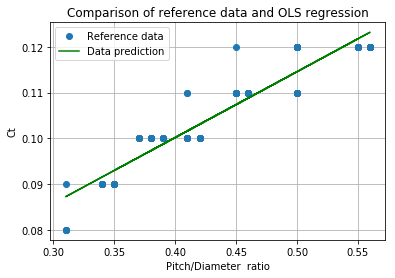

Ct estimation model : Ct = 4.27e-02 + 1.44e-01 * p/D 


In [5]:
# Determination of the least squares estimator with the OLS function 
# of the SatsModels package

import statsmodels.api as sm

# Data
x = df_MR_ND['ANGLE'].values
y_Ct = df_MR_ND['Ct'].values
y_Cp = df_MR_ND['Cp'].values

# Matrix X and Y
X = np.concatenate((np.ones(np.size(x)).reshape(np.size(x),1),x.reshape(np.size(x),1)), axis=1)

Y_Ct = y_Ct.reshape((np.size(x),1))
Y_Cp = y_Cp.reshape((np.size(x),1))

# OLS regression
model_Ct = sm.OLS(Y_Ct, X)
model_Cp = sm.OLS(Y_Cp, X)

result_Ct = model_Ct.fit()
result_Cp = model_Cp.fit()

# Ct Parameters 
# ----
print('Parameters: ', result_Ct.params)
print('R2: ', result_Ct.rsquared)

# Y vector prediction
Ct_OLS = result_Ct.predict(X)

# Plot the data 
plt.plot(x, y_Ct, 'o', label='Reference data')
plt.plot(x, Ct_OLS, '-g', label='Data prediction')
plt.xlabel('Pitch/Diameter  ratio')
plt.ylabel('Ct')
plt.title('Comparison of reference data and OLS regression')
plt.legend()
plt.grid()
plt.show()

print("Ct estimation model : Ct = %.2e + %.2e * p/D "%(result_Ct.params[0],result_Ct.params[1]))

> **Exercice**: Produce an OLS (Ordinary Least Square) regression of $C_p$ data. 

Parameters:  [-0.00147773  0.09718302]
R2:  0.7983614111956401


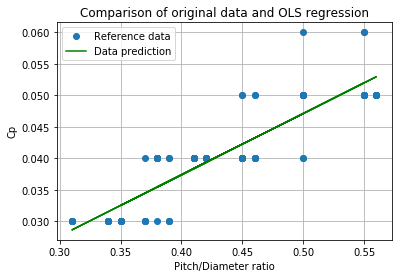

Cp estimation model : Cp = -1.48e-03 + 9.72e-02 * p/D 


In [7]:
y_Cp = df_MR_ND['Cp'].values
model_Cp = sm.OLS(Y_Cp, X)

# Cp Parameters 
# -----
print('Parameters: ', result_Cp.params)
print('R2: ', result_Cp.rsquared)

# Y vector prediction
Cp_OLS = result_Cp.predict(X)

# Plot the data 
plt.plot(x, y_Cp, 'o', label='Reference data')
plt.plot(x, Cp_OLS, '-g', label='Data prediction')
plt.xlabel('Pitch/Diameter ratio')
plt.ylabel('Cp')
plt.title('Comparison of original data and OLS regression')
plt.legend()
plt.grid()
plt.show()

print("Cp estimation model : Cp = %.2e + %.2e * p/D "%(result_Cp.params[0],result_Cp.params[1]))

<a id='section_4'></a>